In [ ]:

from distill_circuit import *
import matplotlib.pyplot as plt
import numpy.ma as ma

In [ ]:
n_points = 100
a_vals = np.linspace(-.5, .5, n_points)
b_vals = np.linspace(-.5, .5, n_points)
# all_ones = 1/2 * np.array([[1, 1], [1,1]])
aa, bb = np.meshgrid(a_vals, b_vals)
r = np.hypot(2 * aa, 2 * bb)
mask = r <=1.0
I = np.array(I)
valid_idxs_flat = np.where(np.hypot(2 * aa, 2 * bb).flatten() <=1.0)[0]

In [ ]:
valid_idxs_flat

array([ 140,  141,  142, ..., 9857, 9858, 9859])

In [ ]:
n_distill = 2
distill_outs = []
for ix in valid_idxs_flat:
    a, b = aa.flatten()[ix], bb.flatten()[ix]
    qubit_dm = qi.DensityMatrix(1./2 * I + a * Z + b*X)
    distill_outs.append(repeat_distill(qubit_dm, n_distill))

Maximum T fidelity:  0.8404134721913447
Maximum T fidelity:  0.8767292844769582
Maximum T fidelity:  0.8552918856226989
Maximum T fidelity:  0.8839201506023393
Maximum T fidelity:  0.8678571423289276
Maximum T fidelity:  0.8904093588927185
Maximum T fidelity:  0.878385902320481
Maximum T fidelity:  0.8962200516672556
Maximum T fidelity:  0.8871351976490177
Maximum T fidelity:  0.9013752328307543
Maximum T fidelity:  0.8943339124002356
Maximum T fidelity:  0.5783489044114568
Maximum T fidelity:  0.6343638676187042
Maximum T fidelity:  0.5877931089052891
Maximum T fidelity:  0.6508108421347198
Maximum T fidelity:  0.5971092661758182
Maximum T fidelity:  0.6668341342859865
Maximum T fidelity:  0.6062728226854553
Maximum T fidelity:  0.6821660274078478
Maximum T fidelity:  0.6152549545708347
Maximum T fidelity:  0.6964408966541578
Maximum T fidelity:  0.6240222082812421
Maximum T fidelity:  0.7091776466613995
Maximum T fidelity:  0.6325361556117364
Maximum T fidelity:  0.7197674711422423
M

In [ ]:
initial_magic = [magic_fidelity(qi.DensityMatrix(1./2 * I + aa.flatten()[i]*Z + bb.flatten()[i]*X))
                for i in valid_idxs_flat]

In [ ]:
distill_outs = np.array(distill_outs).reshape(len(valid_idxs_flat), n_distill)

In [ ]:
# 10 distills at .908
np.max(distill_outs)

0.9062631995822013

Text(0.5, 1.0, '$M_0 \\, , \\, \\rho = 1/2 I + aZ + bX$')

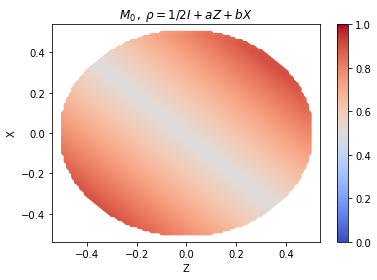

In [ ]:
aa_flat, bb_flat = aa.flatten(), bb.flatten()
plt.scatter(aa_flat[valid_idxs_flat], bb_flat[valid_idxs_flat], c=initial_magic,
            cmap="coolwarm", vmin=0, vmax=1)
plt.colorbar()
plt.xlabel("Z")
plt.ylabel("X")
plt.title(r"$M_0 \, , \, \rho = 1/2 I + aZ + bX$")

Text(0.5, 1.0, '$\\Delta M (1 rounds)\\, , \\, \\rho = 1/2 I + aZ + bX$')

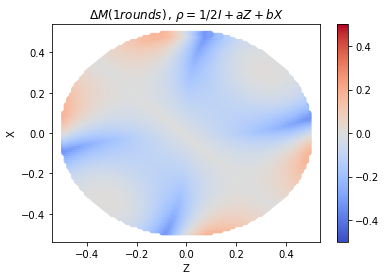

In [ ]:
aa_flat, bb_flat = aa.flatten(), bb.flatten()
plt.scatter(aa_flat[valid_idxs_flat], bb_flat[valid_idxs_flat], c=distill_outs[:,0]-initial_magic,
            cmap="coolwarm", vmin=-.5, vmax=.5)
plt.colorbar()
plt.xlabel("Z")
plt.ylabel("X")
plt.title(r"$\Delta M (1 rounds)\, , \, \rho = 1/2 I + aZ + bX$")

Text(0.5, 1.0, '$\\Delta M (2 rounds)\\, , \\, \\rho = 1/2 I + aZ + bX$')

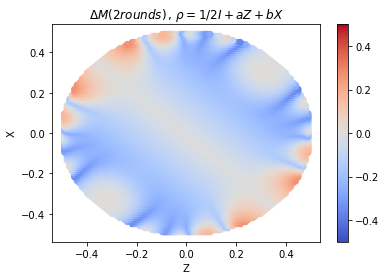

In [ ]:
aa_flat, bb_flat = aa.flatten(), bb.flatten()
plt.scatter(aa_flat[valid_idxs_flat], bb_flat[valid_idxs_flat], c=distill_outs[:,1]-initial_magic,
            cmap="coolwarm", vmin=-.5, vmax=.5)
plt.colorbar()
plt.xlabel("Z")
plt.ylabel("X")
plt.title(r"$\Delta M (2 rounds)\, , \, \rho = 1/2 I + aZ + bX$")

In [ ]:
quarter_idxs = np.where((r.flatten() <= 1.0) & (aa_flat + bb_flat > 0) & (bb_flat > aa_flat) )[0]
initial_magic_q = np.array([magic_fidelity(qi.DensityMatrix(1./2 * I + aa.flatten()[i]*Z + bb.flatten()[i]*X))
                for i in quarter_idxs])

In [ ]:
n_distill = 10
distill_outs_q = []
for ix in quarter_idxs:
    a, b = aa.flatten()[ix], bb.flatten()[ix]
    qubit_dm = qi.DensityMatrix(1./2 * I + a * Z + b*X)
    distill_outs_q.append(repeat_distill(qubit_dm, n_distill))

Maximum T fidelity:  0.5925611804108745
Maximum T fidelity:  0.5069463313704679
Maximum T fidelity:  0.500002551662106
Maximum T fidelity:  0.5000000000000002
Maximum T fidelity:  0.5
Maximum T fidelity:  0.5
Maximum T fidelity:  0.5
Maximum T fidelity:  0.5
Maximum T fidelity:  0.5
Maximum T fidelity:  0.623123158668986
Maximum T fidelity:  0.6037557510374966
Maximum T fidelity:  0.5095568698471686
Maximum T fidelity:  0.5000088664074817
Maximum T fidelity:  0.5000000000000072
Maximum T fidelity:  0.5000000000000001
Maximum T fidelity:  0.5
Maximum T fidelity:  0.5
Maximum T fidelity:  0.5
Maximum T fidelity:  0.5
Maximum T fidelity:  0.5945672514224043
Maximum T fidelity:  0.5958549323705518
Maximum T fidelity:  0.540754540147375
Maximum T fidelity:  0.5009638532695766
Maximum T fidelity:  0.5000000087976362
Maximum T fidelity:  0.5
Maximum T fidelity:  0.5
Maximum T fidelity:  0.5
Maximum T fidelity:  0.5
Maximum T fidelity:  0.5
Maximum T fidelity:  0.5653167080977989
Maximum T fid

In [ ]:
distill_outs_q = np.array(distill_outs_q).reshape(len(quarter_idxs), n_distill)

Text(0.5, 1.0, '$\\Delta M (10 rounds)\\, , \\, \\rho = 1/2 I + aZ + bX$')

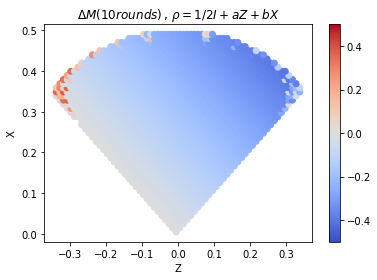

In [ ]:
n_round = 10
plt.scatter(aa_flat[quarter_idxs], bb_flat[quarter_idxs], c=distill_outs_q[:,n_round-1]-initial_magic_q,
            cmap="coolwarm", vmin=-.5, vmax=.5)
plt.colorbar()
plt.xlabel("Z")
plt.ylabel("X")
plt.title(r"$\Delta M ({} rounds)\, , \, \rho = 1/2 I + aZ + bX$".format(n_round))

Text(0.5, 1.0, '$Final M (3 rounds)\\, , \\, \\rho = 1/2 I + aZ + bX$')

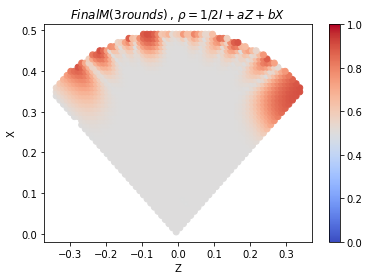

In [ ]:
n_round = 3
plt.scatter(aa_flat[quarter_idxs], bb_flat[quarter_idxs], c=distill_outs_q[:,n_round-1],
            cmap="coolwarm", vmin=0, vmax=1)
plt.colorbar()
plt.xlabel("Z")
plt.ylabel("X")
plt.title(r"$Final M ({} rounds)\, , \, \rho = 1/2 I + aZ + bX$".format(n_round))

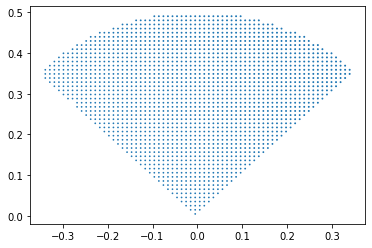

'\n<link rel="stylesheet"\nhref="https://maxcdn.bootstrapcdn.com/font-awesome/4.4.0/css/font-awesome.min.css">\n<script language="javascript">\n  function isInternetExplorer() {\n    ua = navigator.userAgent;\n    /* MSIE used to detect old browsers and Trident used to newer ones*/\n    return ua.indexOf("MSIE ") > -1 || ua.indexOf("Trident/") > -1;\n  }\n\n  /* Define the Animation class */\n  function Animation(frames, img_id, slider_id, interval, loop_select_id){\n    this.img_id = img_id;\n    this.slider_id = slider_id;\n    this.loop_select_id = loop_select_id;\n    this.interval = interval;\n    this.current_frame = 0;\n    this.direction = 0;\n    this.timer = null;\n    this.frames = new Array(frames.length);\n\n    for (var i=0; i<frames.length; i++)\n    {\n     this.frames[i] = new Image();\n     this.frames[i].src = frames[i];\n    }\n    var slider = document.getElementById(this.slider_id);\n    slider.max = this.frames.length - 1;\n    if (isInternetExplorer()) {\n      

In [ ]:
def update_plot(i):
    scat.set_array(distill_outs_q[:,i]-initial_magic_q)
    fig.gca().set_title("Delta magic: {} rounds".format(i+1))
    return scat,
    
fig = plt.figure()
scat = plt.scatter(aa_flat[quarter_idxs], bb_flat[quarter_idxs], initial_magic_q)

ani = animation.FuncAnimation(fig, update_plot, frames=range(n_distill))
plt.show()



In [ ]:
ani.to_jshtml()

'\n<link rel="stylesheet"\nhref="https://maxcdn.bootstrapcdn.com/font-awesome/4.4.0/css/font-awesome.min.css">\n<script language="javascript">\n  function isInternetExplorer() {\n    ua = navigator.userAgent;\n    /* MSIE used to detect old browsers and Trident used to newer ones*/\n    return ua.indexOf("MSIE ") > -1 || ua.indexOf("Trident/") > -1;\n  }\n\n  /* Define the Animation class */\n  function Animation(frames, img_id, slider_id, interval, loop_select_id){\n    this.img_id = img_id;\n    this.slider_id = slider_id;\n    this.loop_select_id = loop_select_id;\n    this.interval = interval;\n    this.current_frame = 0;\n    this.direction = 0;\n    this.timer = null;\n    this.frames = new Array(frames.length);\n\n    for (var i=0; i<frames.length; i++)\n    {\n     this.frames[i] = new Image();\n     this.frames[i].src = frames[i];\n    }\n    var slider = document.getElementById(this.slider_id);\n    slider.max = this.frames.length - 1;\n    if (isInternetExplorer()) {\n      